# Age Prediction using NHANES dataset

## Section 1: DATA EXPLORATION

NHANES stands for The National Health and Nutrition Examination Survey, is a survey that administered by the Centers for Disease Control and Prevention (CDC). It aimed to collect extensive health and nutritional information from a diverse U.S. population.

In [1]:
# Import necessary libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data Loading

In [2]:
# Load the dataset
demographic = pd.read_csv('/kaggle/input/national-health-and-nutrition-examination-survey/demographic.csv', encoding='latin1')
diet = pd.read_csv('/kaggle/input/national-health-and-nutrition-examination-survey/diet.csv', encoding='latin1')
examination = pd.read_csv('/kaggle/input/national-health-and-nutrition-examination-survey/examination.csv', encoding='latin1')
labs = pd.read_csv('/kaggle/input/national-health-and-nutrition-examination-survey/labs.csv', encoding='latin1')
medications = pd.read_csv('/kaggle/input/national-health-and-nutrition-examination-survey/medications.csv', encoding='latin1')
questionaire = pd.read_csv('/kaggle/input/national-health-and-nutrition-examination-survey/questionnaire.csv', encoding='latin1')

### Extract the relevant variables

Since the dataset contains a lot of features (columns), only those relevant to age prediction or health analysis will be used. The variables and description are as belows:

**SEQN**: sequence number

***Demographic*** <br>
-**RIAGENDR**: gender; 1- male, 2- female <br>
-**RIDAGEYR**: age in years **Individuals 80 and over are topcoded at 80 years of age

***Examination***<br>
-**BPXDI1**, **BPXDI2**, **BPXDI3**: Diastolic blood pressure (mm/Hg)<br>
-**BPXSY**, **BPXSY2**, **BPXSY3**: Systolic blood pressure (mm/Hg)<br>
-**BMXBMI**: BMI index<br>
-**BMXWT**: Weight (kg)<br>
-**BMXHT**: Height (cm)<br>
-**BPXPULS**: Pulse; 1- regular, 2- irregular

***Lab***<br>
-**LBXGLT**: Two Hour Glucose in Oral Glucose Tolerance Test (mg/dL)<br>
-**LBXIN**: Insulin Level (uU/mL)<br>

***Questionaire***<br>
-**DIQ010**: Diagnosed with diabetes; 1- Yes, 2-No, 3-Borderline, 7- Refused, 9- Don't know<br>
-**PAQ715**: Average hours per day use a computer (outside of school/work) ;0- < 1 hr, 1- 1 hr, 2- 2 hrs, 3- 3 hrs, 4- 4 hrs, 5- >= 5 hrs. 8- don't use a computer

In [3]:
# The relevant features columns
demoCols = ['SEQN', 'RIDAGEYR', 'RIAGENDR']
examCols = ['SEQN', 'BPXDI1', 'BPXDI2', 'BPXDI3', 'BPXSY1', 'BPXSY2', 'BPXSY3',  'BMXBMI', 'BMXWT', 'BMXHT', 'BPXPULS']
labsCols = ['SEQN','LBXGLT', 'LBXIN']
quesCols = ['SEQN', 'DIQ010', 'PAQ715']

In [4]:
# Merging the DataFrames on 'SEQN'
df = demographic[demoCols] \
    .merge(examination[examCols], on='SEQN', how='left') \
    .merge(labs[labsCols], on='SEQN', how='left') \
    .merge(questionaire[quesCols], on='SEQN', how='left')

In [5]:
# observe first 5 rows of dataframe
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,SEQN,RIDAGEYR,RIAGENDR,BPXDI1,BPXDI2,BPXDI3,BPXSY1,BPXSY2,BPXSY3,BMXBMI,BMXWT,BMXHT,BPXPULS,LBXGLT,LBXIN,DIQ010,PAQ715
0,73557,69,1,72.0,76.0,74.0,122.0,114.0,102.0,26.7,78.3,171.3,1.0,NaN,NaN,1.0,8.0
1,73558,54,1,62.0,80.0,42.0,156.0,160.0,156.0,28.6,89.5,176.8,1.0,NaN,NaN,1.0,8.0
2,73559,72,1,90.0,76.0,80.0,140.0,140.0,146.0,28.9,88.9,175.3,1.0,NaN,5.83,1.0,0.0
3,73560,9,1,38.0,34.0,38.0,108.0,102.0,104.0,17.1,32.2,137.3,1.0,NaN,NaN,2.0,2.0
4,73561,73,2,86.0,88.0,86.0,136.0,134.0,142.0,19.7,52.0,162.4,1.0,NaN,6.12,2.0,1.0


In [6]:
# Accessing dataframe basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      10175 non-null  int64  
 1   RIDAGEYR  10175 non-null  int64  
 2   RIAGENDR  10175 non-null  int64  
 3   BPXDI1    7172 non-null   float64
 4   BPXDI2    7409 non-null   float64
 5   BPXDI3    7408 non-null   float64
 6   BPXSY1    7172 non-null   float64
 7   BPXSY2    7409 non-null   float64
 8   BPXSY3    7408 non-null   float64
 9   BMXBMI    9055 non-null   float64
 10  BMXWT     9723 non-null   float64
 11  BMXHT     9067 non-null   float64
 12  BPXPULS   9511 non-null   float64
 13  LBXGLT    2345 non-null   float64
 14  LBXIN     3093 non-null   float64
 15  DIQ010    9769 non-null   float64
 16  PAQ715    9448 non-null   float64
dtypes: float64(14), int64(3)
memory usage: 1.3 MB


It is known that now the data frame consists of 15 features(columns), 10175 respondents(row). In the next session, data cleaning will be done for invalid data and missing values.

### Section 2: DATA CLEANING

### Unique Count

In [7]:
# Check for unique count
print("The number of unique values in each column are:")
print(df.nunique())

The number of unique values in each column are:
SEQN        10175
RIDAGEYR       81
RIAGENDR        2
BPXDI1         59
BPXDI2         56
BPXDI3         58
BPXSY1         71
BPXSY2         73
BPXSY3         74
BMXBMI        440
BMXWT        1385
BMXHT        1089
BPXPULS         2
LBXGLT        234
LBXIN        1745
DIQ010          5
PAQ715          7
dtype: int64


### Frequency distribution of categorical variables

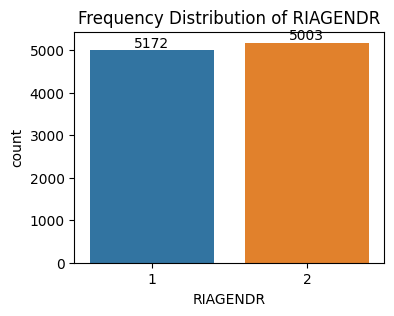

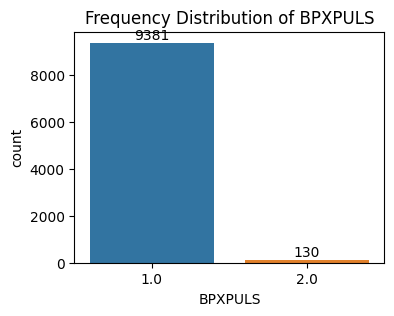

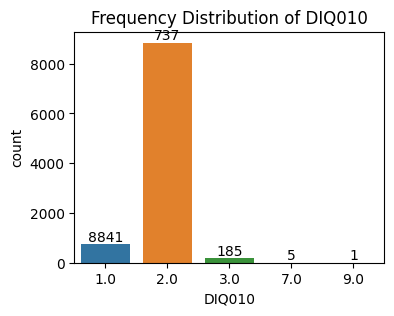

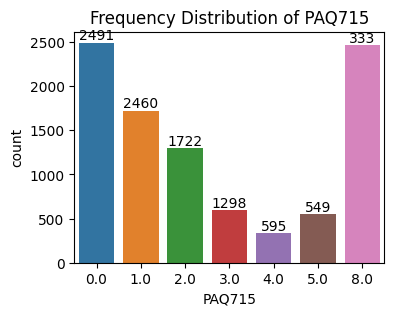

In [8]:
# Plot frequency distribution of the 4 categorical variables
cat = ['RIAGENDR', 'BPXPULS', 'DIQ010', 'PAQ715']
for i in cat:
    plt.figure(figsize=(4, 3))
    ax = sns.countplot(x= i, data=df)
    plt.title(f'Frequency Distribution of {i}')
    # Get absolute values for bar labels
    abs_values = df[i].value_counts(ascending=False).values
    # Add labels to bars
    ax.bar_label(container=ax.containers[0], labels=abs_values)

The frequency distribution plot of categorical variables shows there is no invalid values in the columns. 
Meanwhile for numerical values, boxplot will be plot for detecting outliers or anomalies. Before plotting, the average of three diastolic and systolic blood pressure will be computed to obtain only one value for diastolic and systolic respectively.

### Averaging blood pressure columns

In [9]:
import statistics
# Compute average diastolic blood pressure
df['BPXDI'] = df[['BPXDI1', 'BPXDI2', 'BPXDI3']].mean(axis=1) # perform on columns
df['BPXSY'] = df[['BPXSY1', 'BPXSY2', 'BPXSY3']].mean(axis=1)

In [10]:
# save a new dataframe without original three diastolic and three systolic blood pressure
df2 = df.drop(columns = df[['BPXDI1', 'BPXDI2', 'BPXDI3', 'BPXSY1', 'BPXSY2', 'BPXSY3']], axis = 1)

### Boxplot of numerical variables

<Axes: >

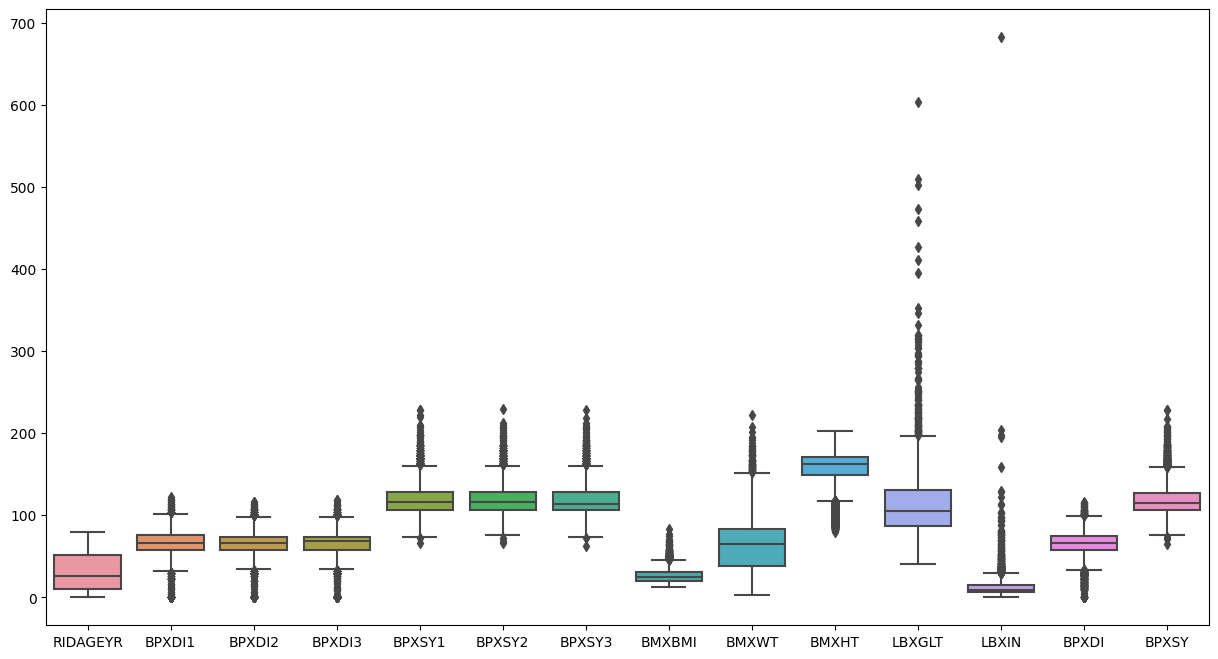

In [11]:
figure = plt.figure(figsize=(15,8))
sns.boxplot(data=df.drop(columns =df[['RIAGENDR', 'BPXPULS', 'DIQ010', 'PAQ715', 'SEQN']]))

From the boxplot, it can ve observed that for LBXIN, there is a very obvious outlier, which located very far away from each other. It will be removed.

In [12]:
# the maximum value in LBXIN
df2['LBXIN'].max() 
# access the index of the outlier
df2[df2['LBXIN']== df2['LBXIN'].max()].index

Index([8329], dtype='int64')

In [13]:
# remove the outlier row
df2 = df2.drop(8329)
# check again the maximum value
df2['LBXIN'].max() 

203.27

### Missing values

In [14]:
# Check for missing values
print("The number of missing values in each column are:")
print(df2.isnull().sum())

The number of missing values in each column are:
SEQN           0
RIDAGEYR       0
RIAGENDR       0
BMXBMI      1120
BMXWT        452
BMXHT       1108
BPXPULS      664
LBXGLT      7829
LBXIN       7082
DIQ010       406
PAQ715       727
BPXDI       2648
BPXSY       2648
dtype: int64


Observed for LBXGLT and LBXIN, the glucose and insulin level contains more than 7000 missing values. The imputation for such large number of missing values may cause the results become not reliable. Hence, all the rows with missing values are removed.

In [15]:
# Drop all the missing values
df3 = df2.dropna()

In [16]:
# print the new data frame
df3

,SEQN,RIDAGEYR,RIAGENDR,BMXBMI,BMXWT,BMXHT,BPXPULS,LBXGLT,LBXIN,DIQ010,PAQ715,BPXDI,BPXSY
7,73564,61,2,35.7,93.4,161.8,1.0,150.0,14.91,2.0,0.0,80.666667,122.666667
11,73568,26,2,20.3,47.1,152.5,1.0,80.0,3.85,2.0,8.0,62.666667,104.666667
19,73576,16,1,23.2,67.3,170.4,1.0,68.0,6.14,2.0,0.0,66.666667,109.333333
20,73577,32,1,28.9,79.7,166.2,1.0,84.0,16.15,2.0,8.0,75.333333,119.333333
23,73580,38,2,35.9,93.5,161.4,1.0,81.0,10.92,2.0,0.0,75.000000,121.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10154,83711,38,2,33.5,81.9,156.3,1.0,73.0,6.53,2.0,1.0,75.000000,110.000000
10155,83712,61,1,30.0,90.8,174.1,1.0,208.0,13.02,2.0,0.0,74.000000,125.333333
10156,83713,34,1,23.7,62.5,162.4,1.0,124.0,21.41,2.0,2.0,68.666667,114.666667
10161,83718,60,2,27.4,74.7,165.1,1.0,108.0,4.99,2.0,0.0,69.333333,116.000000


The dataframe now contain only 2233 respondents. We will check missing values again.

In [17]:
print("The number of missing values in each column are:")
print(df3.isnull().sum())

The number of missing values in each column are:
SEQN        0
RIDAGEYR    0
RIAGENDR    0
BMXBMI      0
BMXWT       0
BMXHT       0
BPXPULS     0
LBXGLT      0
LBXIN       0
DIQ010      0
PAQ715      0
BPXDI       0
BPXSY       0
dtype: int64


## Section 3: Explanatory Data Analysis

## Section 4: Classification of Age Groups

Instead of predicting the exact age of respondent, it is better to predict age group. Hence, the respondent will be categorized into age groups as belows:<br>
**Children**- 0-14 years <br>
**Youth**- 15-24 years<br>
**Adults**- 25-64 years<br>
**Seniors**- 65 years and elder

In [18]:
# Create age group dictionary
ageGroup = {'Children-Youth': range(0,25), 
           'Adults': range(25,65),
           'Seniors': range(65,81)}
# Map the age into ageGroup, the new column
# Function to map age
def map_age_group(age):
    for group, age_range in ageGroup.items(): #.items() returns key-value pairs as tuples
        if age in age_range:  # Check if age is in the given range
            return group
    return 'Unknown'

df3['ageGroup'] = df3['RIDAGEYR'].apply(map_age_group)

<ipython-input-18-f55a0ddc0a5f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['ageGroup'] = df3['RIDAGEYR'].apply(map_age_group)


[Text(0, 0, '1292'), Text(0, 0, '590'), Text(0, 0, '351')]

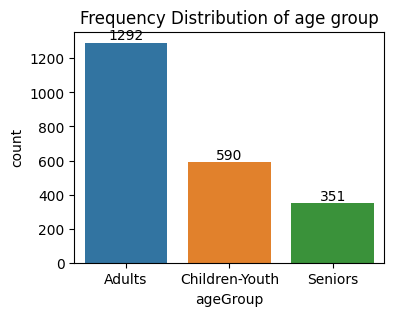

In [19]:
plt.figure(figsize=(4, 3))
ax = sns.countplot(x= df3['ageGroup'], data=df3)
plt.title('Frequency Distribution of age group')
abs_values = df3['ageGroup'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

### Supervised learning Algorithm

In [20]:
# Remove column RIDAGEYR, SEQN from the dataset for classification
df3_trim = df3.drop(columns = df3[['RIDAGEYR', 'SEQN']], axis = 1)

### Gaussian Naive Bayes

In [21]:
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [22]:
# Load features and target
features = df3_trim.drop(columns = 'ageGroup')
target= df3_trim["ageGroup"]

In [23]:
# Split the dataset into 80% training set and 20% test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    features, target, test_size=0.2, random_state=123)

In [24]:
print("The training set shape is", X_train.shape, "and The test set shape is", X_test.shape)

The training set shape is (1786, 11) and The test set shape is (447, 11)


In [25]:
#Create GNB object
classiferGNB = GaussianNB()
#Train model with GNB
modelGNB = classiferGNB.fit(X_train,y_train)
#Make prediction on test set
predictGNB= modelGNB.predict(X_test)

In [26]:
#Print the classification metric for evaluation
print(classification_report(y_test, predictGNB))

                precision    recall  f1-score   support

        Adults       0.72      0.53      0.61       258
Children-Youth       0.44      0.82      0.57       120
       Seniors       0.53      0.29      0.37        69

      accuracy                           0.57       447
     macro avg       0.56      0.54      0.52       447
  weighted avg       0.62      0.57      0.56       447



### K Nearest Neighbours

In [27]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [28]:
scaler = preprocessing.MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
modelKNN = KNeighborsClassifier(n_neighbors=10)

#Train the model using KNN with scaled data
modelKNN.fit(X_train_scaled,y_train)

#Make prediction
predictKNN = modelKNN.predict(X_test_scaled)

print(classification_report(y_test, predictKNN))

                precision    recall  f1-score   support

        Adults       0.66      0.86      0.75       258
Children-Youth       0.69      0.43      0.53       120
       Seniors       0.51      0.28      0.36        69

      accuracy                           0.66       447
     macro avg       0.62      0.52      0.55       447
  weighted avg       0.65      0.66      0.63       447



### Multinomial Naive Bayes

In [30]:
from sklearn.naive_bayes import MultinomialNB

In [31]:
classifierMNB= MultinomialNB()

modelMNB = classifierMNB.fit(X_train,y_train)

predictMNB = modelMNB.predict(X_test)

print(classification_report(y_test, predictMNB))

                precision    recall  f1-score   support

        Adults       0.69      0.61      0.65       258
Children-Youth       0.56      0.53      0.54       120
       Seniors       0.32      0.48      0.38        69

      accuracy                           0.57       447
     macro avg       0.52      0.54      0.53       447
  weighted avg       0.60      0.57      0.58       447



### REFERENCES

1. http://wwwn.cdc.gov/nchs/nhanes/search/variablelist.aspx?Component=Demographics&Cycle=2013-2014